## BIA Bob
BIA Bob is a Jupyter-magic based assistant for interacting with data via code. 

In [1]:
from bia_bob import bob
bob.initialize('gpt-4-1106-preview')
bob.__version__

'0.10.2'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will generate code for this and paste it in a new cell below. You need to wait until this cell exists before you can execute it. Thus, running an entire notebook in one shot makes little sense. Run it cell-by-cell instead and consider reading generated code before executing it.

In [2]:
%bob Load the ../../data/blobs.tif image file and show it.

I will load an image file named `blobs.tif` located two directories up in the `data` folder and display it.



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
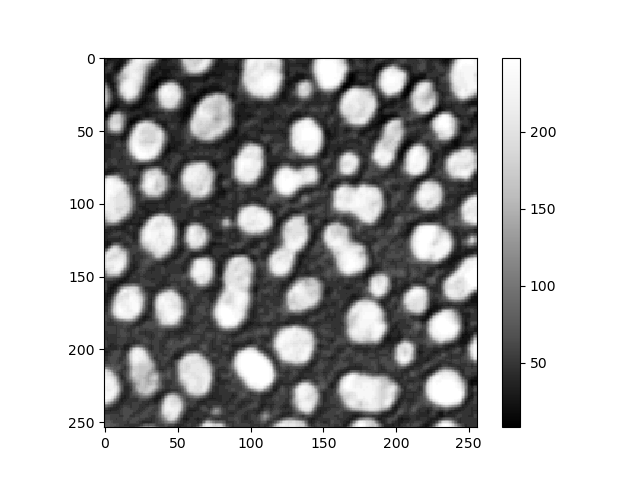
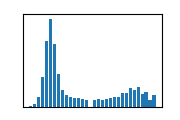

In [3]:
from skimage.io import imread
import stackview

# Load the image
image = imread('../../data/blobs.tif')

# Show the image
stackview.insight(image)

In [4]:
%%bob
Load the ../../data/blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

I will load a grayscale image named `blobs.tif`, segment the nuclei-like objects using Otsu's thresholding method and connected component labeling, measure the area of each label, and finally print the area on top of the corresponding labels.



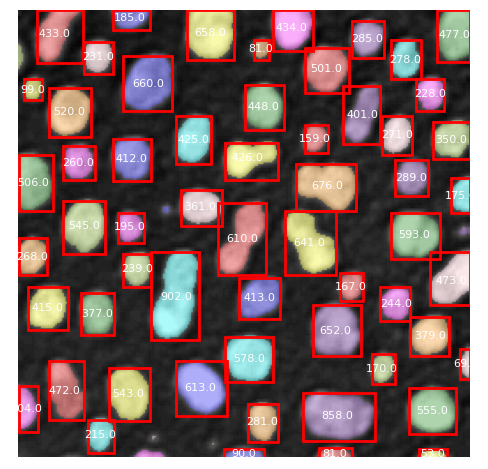

In [5]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = imread('../../data/blobs.tif')

# Apply Otsu's threshold
thresh = threshold_otsu(image)
binary = image > thresh

# Label the image
label_image = label(binary)

# Measure properties of labeled regions
properties = regionprops(label_image)

# Annotate the image with area information
annotated_image = label2rgb(label_image, image=image)

fig, ax = plt.subplots()
ax.imshow(annotated_image)

for region in properties:
    # take regions with large enough areas
    if region.area >= 50: 
        # draw rectangle around segmented objects
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
        # print area on top of the nuclei-like objects
        ax.text(region.centroid[1], region.centroid[0], f'{region.area}', 
                verticalalignment='center', horizontalalignment='center',
                color='white', fontsize=8)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [6]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

I will take the given segmented label image and expand the labels by 4 pixels, then display the resulting label image.



StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
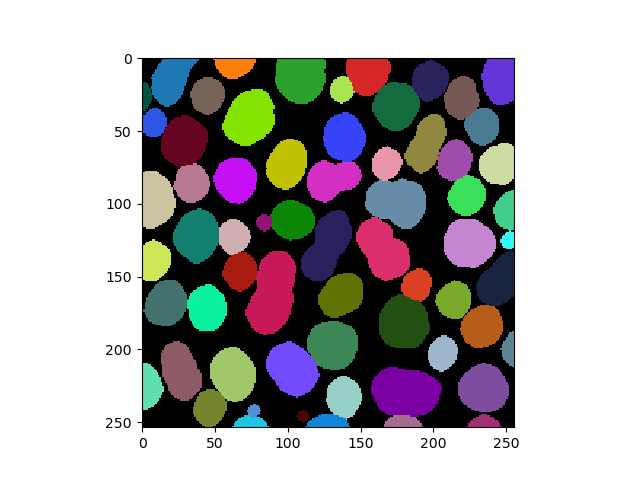

In [7]:
from skimage.segmentation import expand_labels
import stackview

# Expand the labels by 4 pixels
expanded_labels = expand_labels(label_image, distance=4)

# Show the resulting expanded label image
stackview.insight(expanded_labels)